In [ ]:
import pandas as pd

# Load the dataset with the correct encoding
data = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1') # If the file is in the same directory

# Display the first few rows and summary of the dataset
print(data.head())
print(data.info())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [ ]:
# Check if there are any null values in the entire dataset
has_nulls = data.isnull().values.any()

# Display if null values exist
print("Are there any null values in the dataset?", has_nulls)


Are there any null values in the dataset? False


In [ ]:
import pandas as pd

# Load the dataset with the correct encoding
data = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1') # Try 'latin-1' encoding first. If it doesn't work, experiment with other encodings like 'cp1252', 'iso-8859-1', etc.


# prompt: do preprocessing but the dataset doesnot have null values

# Since there are no null values, we can proceed with other preprocessing steps.

# Example: Feature scaling for numerical features
from sklearn.preprocessing import MinMaxScaler

# Select numerical features, ensuring names match the DataFrame columns exactly
numerical_features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the preprocessed data
print(data.head())

         Date  Rented Bike Count      Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017           0.071429  0.000000         0.220280     0.377551   
1  01/12/2017           0.057368  0.043478         0.215035     0.387755   
2  01/12/2017           0.048650  0.086957         0.206294     0.397959   
3  01/12/2017           0.030090  0.130435         0.202797     0.408163   
4  01/12/2017           0.021935  0.173913         0.206294     0.367347   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          0.297297               1.0                   0.224913   
1          0.108108               1.0                   0.224913   
2          0.135135               1.0                   0.223183   
3          0.121622               1.0                   0.224913   
4          0.310811               1.0                   0.207612   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Load the dataset with the correct encoding
data = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1') # Try 'latin-1' encoding first. If it doesn't work, experiment with other encodings like 'cp1252', 'iso-8859-1', etc.

# Data Wrangling and Feature Engineering

# Convert 'Date' column to datetime objects
# Check if the 'Date' column exists before converting
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], dayfirst=True) # Added dayfirst=True to handle day first format

    # Extract day of the week from the 'Date' column
    data['DayofWeek'] = data['Date'].dt.dayofweek

    # Create separate columns for month and year
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year

    # Remove the original 'Date' column as it is no longer needed
    data = data.drop(['Date'], axis=1)

# Categorical Feature Encoding
# One-hot encode the 'Seasons' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_seasons = encoder.fit_transform(data[['Seasons']])
encoded_seasons_df = pd.DataFrame(encoded_seasons, columns=encoder.get_feature_names_out(['Seasons']))
data = pd.concat([data, encoded_seasons_df], axis=1)

# Feature Interaction
# Create a new feature representing the interaction between temperature and humidity
data['Temp_Humidity_Interaction'] = data['Temperature(°C)'] * data['Humidity(%)']

# Binning
# Bin the 'Hour' column into time periods (e.g., morning, afternoon, evening)
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['TimeOfDay'] = pd.cut(data['Hour'], bins=bins, labels=labels, include_lowest=True)
encoded_time_of_day = encoder.fit_transform(data[['TimeOfDay']])
encoded_time_of_day_df = pd.DataFrame(encoded_time_of_day, columns=encoder.get_feature_names_out(['TimeOfDay']))
data = pd.concat([data, encoded_time_of_day_df], axis=1)

# Removing Unnecessary Features
# Remove the original 'Seasons', and 'TimeOfDay' columns as they are no longer needed
data = data.drop(['Seasons', 'TimeOfDay'], axis=1)

# Feature scaling for numerical features
numerical_features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


# Splitting Data
# Split the data into training and testing sets
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data
print(X_train.head())

          Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
8415  0.652174         0.541958     0.622449          0.527027   
5049  0.391304         0.711538     0.877551          0.229730   
8395  0.826087         0.506993     0.469388          0.189189   
1535  1.000000         0.265734     0.704082          0.270270   
5518  0.956522         0.786713     0.744898          0.202703   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
8415          0.350735                   0.629758                 0.292614   
5049          0.258996                   0.882353                 0.215909   
8395          0.426761                   0.529412                 0.000000   
1535          0.713127                   0.399654                 0.000000   
5518          0.495692                   0.908304                 0.000000   

      Rainfall(mm)  Snowfall (cm)     Holiday  ...  Year  Seasons_Autumn  \
8415           0.0            0.0  No Holiday  ...  2018  

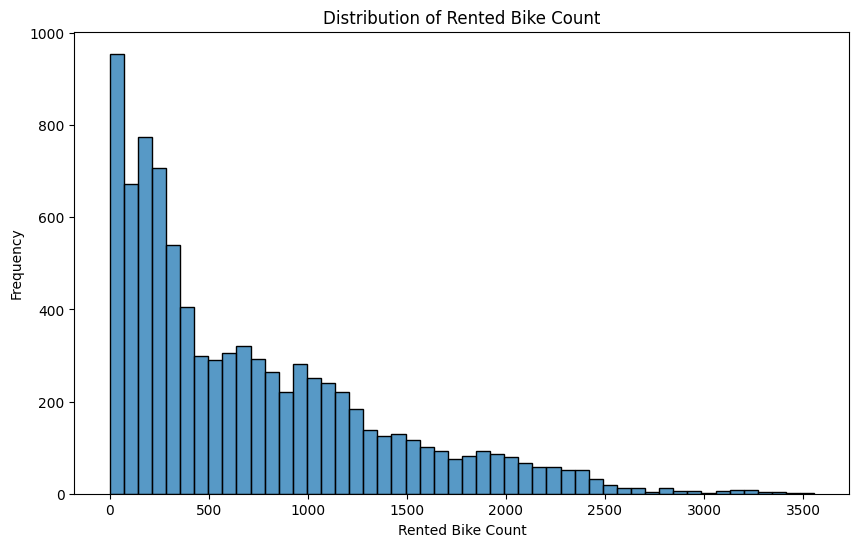

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Rented Bike Count
plt.figure(figsize=(10, 6))
sns.histplot(data['Rented Bike Count'], bins=50)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()


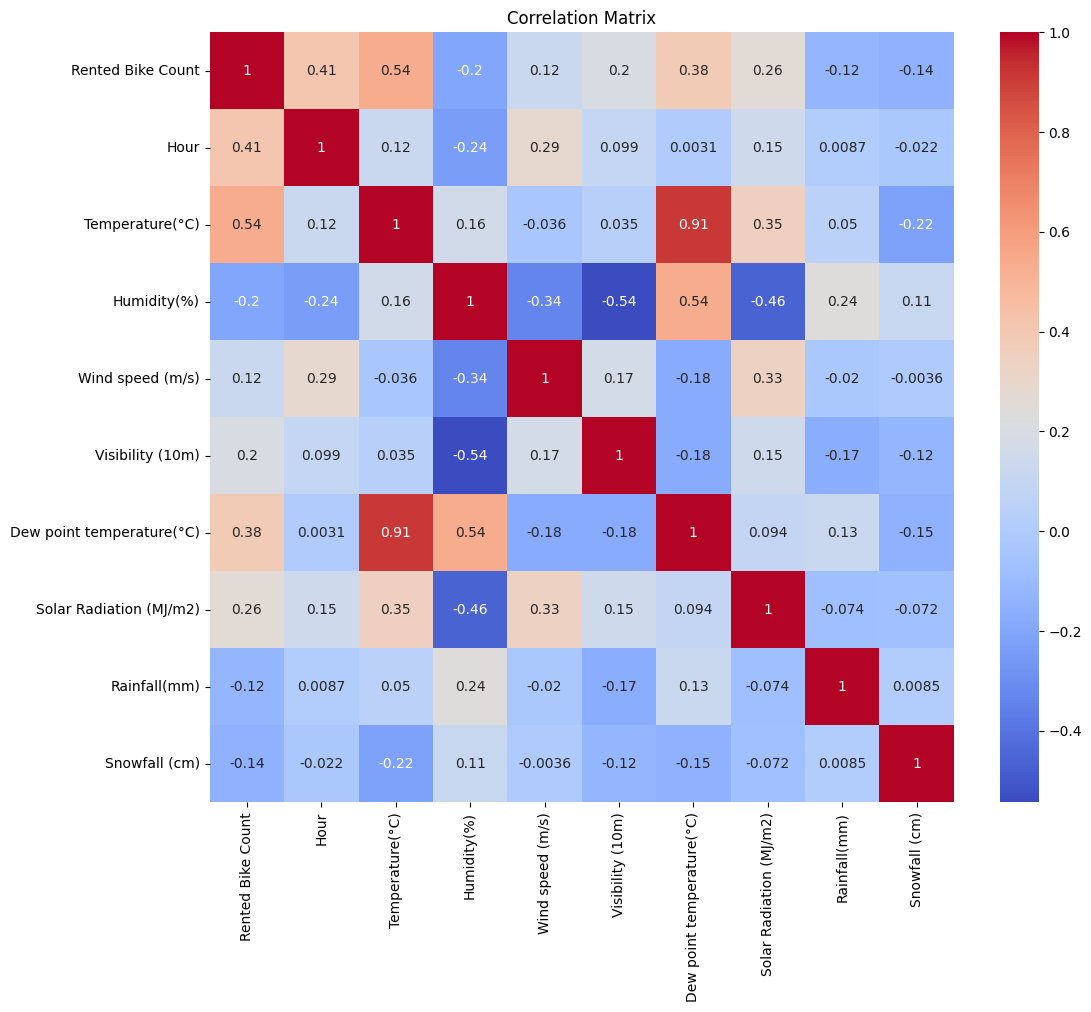

In [ ]:
# 2. Correlation Matrix
# Check if 'Date' column exists before converting
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') # Specify the correct format for day first

# Extract numerical features for correlation analysis
numerical_features = ['Rented Bike Count', 'Hour', 'Temperature(°C)',
                      'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                      'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                      'Rainfall(mm)', 'Snowfall (cm)']

# Calculate correlation matrix for numerical features
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

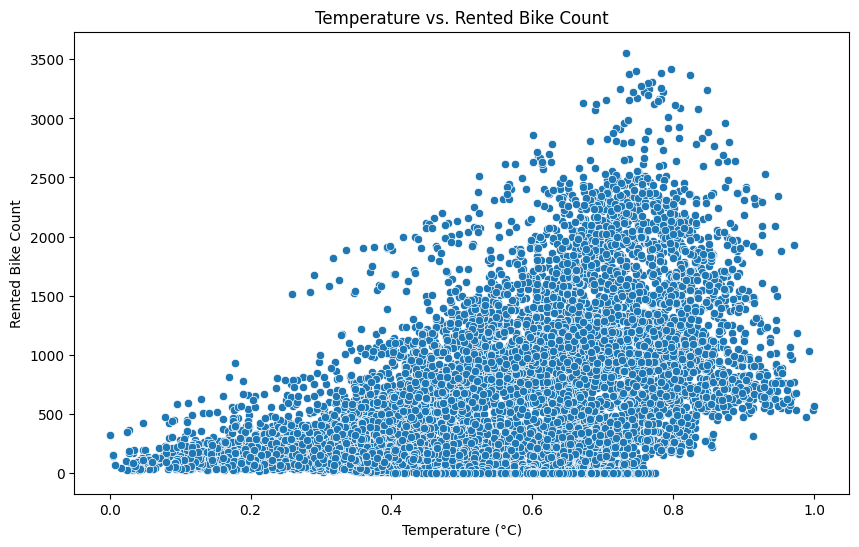

In [ ]:

# 3. Relationship between Temperature and Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data)
plt.title('Temperature vs. Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

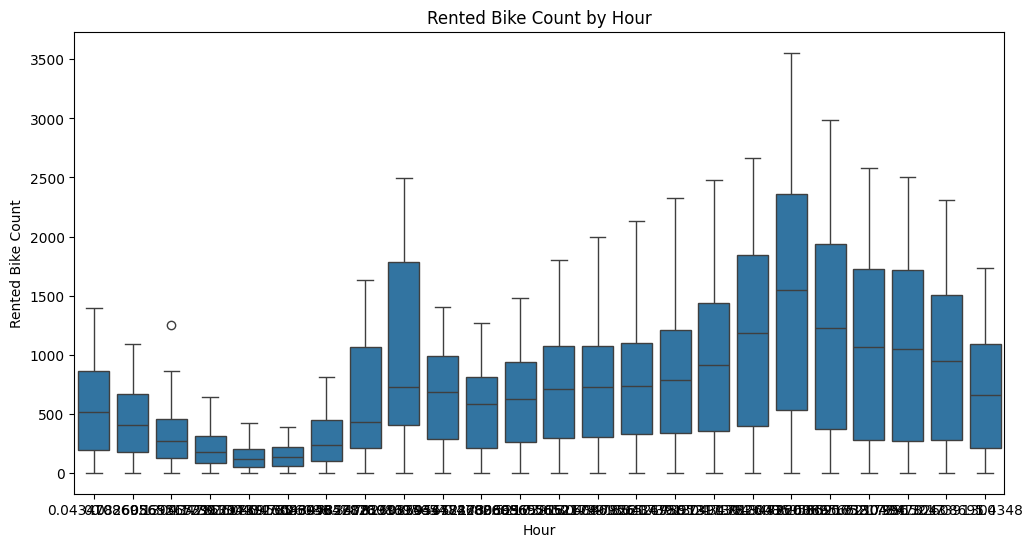

In [ ]:
# 4. Boxplot of Rented Bike Count by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

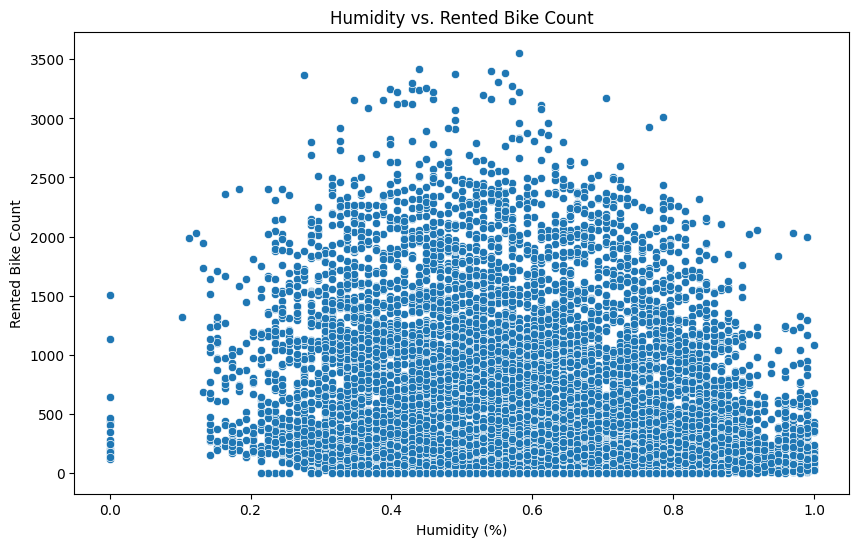

In [ ]:

# 5.  Relationship between Humidity and Rented Bike Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=data)
plt.title('Humidity vs. Rented Bike Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (Assuming your data loading and preprocessing steps are done before this)

# One-hot encode categorical features
# Check if the columns exist before trying to encode them
columns_to_encode = ['Seasons', 'Holiday', 'Functioning Day']
existing_columns = [col for col in columns_to_encode if col in data.columns]

if existing_columns:
    data = pd.get_dummies(data, columns=existing_columns)

# Split the data into training and testing sets
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - R2 Score:", r2_linear)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression - MSE:", mse_tree)
print("Decision Tree Regression - R2 Score:", r2_tree)

# Random Forest Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression - MSE:", mse_rf)
print("Random Forest Regression - R2 Score:", r2_rf)

Linear Regression - MSE: 172272.1112961345
Linear Regression - R2 Score: 0.5865266604982815
Decision Tree Regression - MSE: 63328.43607305936
Decision Tree Regression - R2 Score: 0.8480043011515789
Random Forest Regression - MSE: 30182.312742123286
Random Forest Regression - R2 Score: 0.9275588976678955


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for Random Forest (reduced grid)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object (reduced iterations for faster search)
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1, random_state=42)

# Fit the random search to a subset of the training data for faster tuning
X_train_sampled = X_train.sample(frac=0.5, random_state=42)
y_train_sampled = y_train.sample(frac=0.5, random_state=42)
random_search.fit(X_train_sampled, y_train_sampled)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Get the best estimator
best_rf_reg = random_search.best_estimator_

# Evaluate the best model on the full test set
y_pred_best_rf = best_rf_reg.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Regression - MSE:", mse_best_rf)
print("Best Random Forest Regression - R2 Score:", r2_best_rf)
0

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}
Best Random Forest Regression - MSE: 40233.2018451885
Best Random Forest Regression - R2 Score: 0.9034355810663937


0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
bike_share_train = pd.read_csv('/content/bike_train.csv')

# Convert 'datetime' to pandas datetime format
bike_share_train['datetime'] = pd.to_datetime(bike_share_train['datetime'], format='%d-%m-%Y %H:%M')
# The format argument is added to specify the correct format of the datetime strings

# Extract useful time-related columns
bike_share_train['hour'] = bike_share_train['datetime'].dt.hour
bike_share_train['day'] = bike_share_train['datetime'].dt.dayofweek  # Monday=0, Sunday=6
bike_share_train['month'] = bike_share_train['datetime'].dt.month

# Check the data
print(bike_share_train.head())



             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  
0        81        0.0       3          13     16     0    5      1  
1        80        0.0       8          32     40     1    5      1  
2        80        0.0       5          27     32     2    5      1  
3        75        0.0       3          10     13     3    5      1  
4        75        0.0       0           1      1     4    5      1  


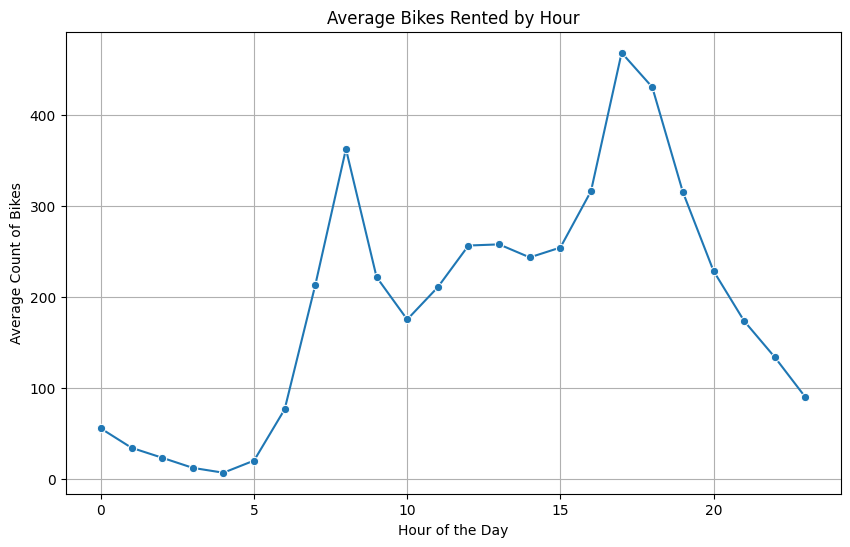

In [ ]:
# Calculate average rentals by hour
hourly_rentals = bike_share_train.groupby('hour')['count'].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=hourly_rentals, marker="o")
plt.title("Average Bikes Rented by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count of Bikes")
plt.grid(True)
plt.show()


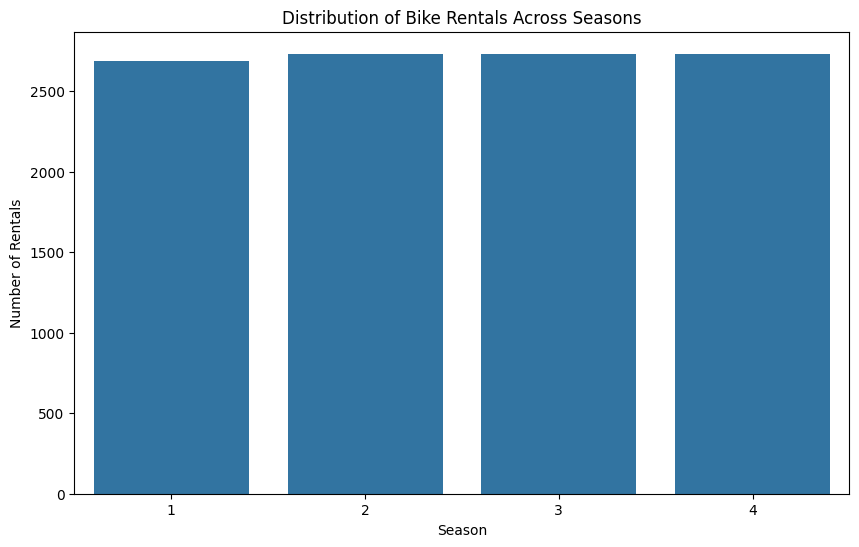

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct DataFrame name (bike_share_train)
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=bike_share_train)  # Also, make sure the column name is 'season'
plt.title('Distribution of Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

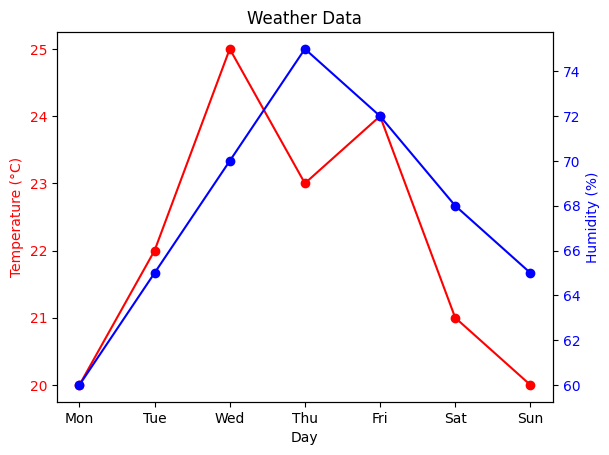

In [ ]:
import matplotlib.pyplot as plt

# Sample weather data (replace with your actual data)
temperature = [20, 22, 25, 23, 24, 21, 20]
humidity = [60, 65, 70, 75, 72, 68, 65]
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot temperature data
ax1.plot(days, temperature, color='red', marker='o')
ax1.set_xlabel('Day')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params('y', labelcolor='red')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.plot(days, humidity, color='blue', marker='o')
ax2.set_ylabel('Humidity (%)', color='blue')
ax2.tick_params('y', labelcolor='blue')

# Set the title
plt.title('Weather Data')

# Display the graph
plt.show()